In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_rows',500)
import plotly.graph_objects as go

# Data load

In [11]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv(r'C:\\Users\\pinak savaliya\\eds_covid-19_analysis\\data\\processed\\COVID_small_sync_timeline_table.csv', sep=';')  

df_analyse.head()

,date,doubling every day,doubling every 2 days,doubling every 4 days,doubling every 10 day,Italy,Spain,India,Germany,US
0,0,100.0,100.000000,100.000000,100.000000,155.0,120.0,102.0,117.0,107.0
1,1,200.0,141.421356,118.920712,107.177346,229.0,165.0,113.0,150.0,184.0
2,2,400.0,200.000000,141.421356,114.869835,322.0,222.0,119.0,188.0,237.0
3,3,800.0,282.842712,168.179283,123.114441,453.0,259.0,142.0,240.0,403.0
4,4,1600.0,400.000000,200.000000,131.950791,655.0,400.0,156.0,349.0,519.0


In [13]:
df_analyse.columns.get_loc('date')

0

In [14]:
df_analyse.sort_values('date',ascending = True).head()

,date,doubling every day,doubling every 2 days,doubling every 4 days,doubling every 10 day,Italy,Spain,India,Germany,US
0,0,100.0,100.000000,100.000000,100.000000,155.0,120.0,102.0,117.0,107.0
1,1,200.0,141.421356,118.920712,107.177346,229.0,165.0,113.0,150.0,184.0
2,2,400.0,200.000000,141.421356,114.869835,322.0,222.0,119.0,188.0,237.0
3,3,800.0,282.842712,168.179283,123.114441,453.0,259.0,142.0,240.0,403.0
4,4,1600.0,400.000000,200.000000,131.950791,655.0,400.0,156.0,349.0,519.0


In [15]:
df_analyse.dtypes

date                       int64
doubling every day       float64
doubling every 2 days    float64
doubling every 4 days    float64
doubling every 10 day    float64
Italy                    float64
Spain                    float64
India                    float64
Germany                  float64
US                       float64
dtype: object

In [16]:
df_analyse.columns.get_loc('Germany')

8

In [17]:
country_list = df_analyse.columns[1:]

In [18]:
def quick_plot(x_in, df_input, y_scale = 'log', slider = False):
    
    " " " Quick basic plot for quick static evaluation of a time series\
          you can push selective columns of your dataframe by .iloc[:, [0,6,7,8]]\
          Parameters:\
          -----------\
          x_in : array\
          array of datetime object, or array of numbers\
          df_input : pandas dataframe\
            the plotting matrix where each column is plotted\
            the name of the column will be used for the legend\
          scale : str\
            y-axis scale as 'log' or 'linear'\
          slider : bool\
            TRUE or FALSE for x-axis slider\
          Returns:\
          ----------" " "
    fig = go.Figure()
    for each in df_input.columns:
        fig.add_trace(go.Scatter(x = x_in, y = df_input[each], name = each, opacity = 0.8))
        
    fig.update_layout(autosize = True, width = 1024, height = 768, font = dict(family = "PT Sans, monospace", size = 18, color = "#7f7f7f"))
    
    fig.update_yaxes(type = 'log') # range = [ 0.1,2]
    fig.update_xaxes(tickangle = -45, nticks = 20, tickfont = dict(size = 14, color = '#7f7f7f'))
    
    if slider == True:
        fig.update_layout(xaxis_rangeslider_visible = True)
    fig.show()

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
quick_plot(df_analyse.date, df_analyse.iloc[:, 5 : 9], y_scale = 'log', slider = True)

**Fitting a polynomial curve**

In [25]:
# check that all data is there
df_poly_check = df_analyse.iloc[:,5:9].reset_index()
df_poly_check.head()

,index,Italy,Spain,India,Germany
0,0,155.0,120.0,102.0,117.0
1,1,229.0,165.0,113.0,150.0
2,2,322.0,222.0,119.0,188.0
3,3,453.0,259.0,142.0,240.0
4,4,655.0,400.0,156.0,349.0


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [28]:
y = df_poly_check[['Italy', 'Spain', 'India', 'Germany']]# these four are stacked into one column now with list within list
y

,Italy,Spain,India,Germany
0,155.0,120.0,102.0,117.0
1,229.0,165.0,113.0,150.0
2,322.0,222.0,119.0,188.0
3,453.0,259.0,142.0,240.0
4,655.0,400.0,156.0,349.0
...,...,...,...,...
854,18234242.0,NaN,NaN,NaN
855,18259261.0,NaN,NaN,NaN
856,18343422.0,NaN,NaN,NaN
857,18438877.0,NaN,NaN,NaN


In [29]:
y = df_poly_check[['Italy', 'Spain', 'India', 'Germany']].unstack()
y

Italy    0      155.0
         1      229.0
         2      322.0
         3      453.0
         4      655.0
                ...  
Germany  854      NaN
         855      NaN
         856      NaN
         857      NaN
         858      NaN
Length: 3436, dtype: float64

In [30]:
y = df_poly_check[['Italy', 'Spain', 'India', 'Germany']].unstack().sort_index(axis =0, level = 1)

In [31]:
y

Germany  0           117.0
India    0           102.0
Italy    0           155.0
Spain    0           120.0
Germany  1           150.0
                   ...    
Spain    857           NaN
Germany  858           NaN
India    858           NaN
Italy    858    18523111.0
Spain    858           NaN
Length: 3436, dtype: float64

In [32]:
y = pd.DataFrame(y)
y

,,0
Germany,0,117.0
India,0,102.0
Italy,0,155.0
Spain,0,120.0
Germany,1,150.0
...,...,...
Spain,857,NaN
Germany,858,NaN
India,858,NaN
Italy,858,18523111.0


In [33]:
y.columns =['value']
y

,,value
Germany,0,117.0
India,0,102.0
Italy,0,155.0
Spain,0,120.0
Germany,1,150.0
...,...,...
Spain,857,NaN
Germany,858,NaN
India,858,NaN
Italy,858,18523111.0


In [34]:
y["value"].fillna(value = 0.001, inplace = True)

In [35]:
y.isnull()

,,value
Germany,0,False
India,0,False
Italy,0,False
Spain,0,False
Germany,1,False
...,...,...
Spain,857,False
Germany,858,False
India,858,False
Italy,858,False


In [36]:
y_reference = y.to_csv(r"C:\Users\pinak savaliya\eds_covid-19_analysis\data\processed\pd_sync_timelines_w_slope.csv", sep = ';')

In [37]:
test_points = 1700
y_train = y[0:-test_points-1] # train dataset where we train our model on
y_test = y[-test_points:] # test dataset where we check our result

In [38]:
count = (y[0:3364] == 0).sum()
count

value    0
dtype: int64

In [39]:
y.isnull()

,,value
Germany,0,False
India,0,False
Italy,0,False
Spain,0,False
Germany,1,False
...,...,...
Spain,857,False
Germany,858,False
India,858,False
Italy,858,False


In [40]:
X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/4.0

In [41]:
import seaborn
seaborn.set(rc = {'figure.figsize':(16,8)})# plot formatting, prepare for subplot

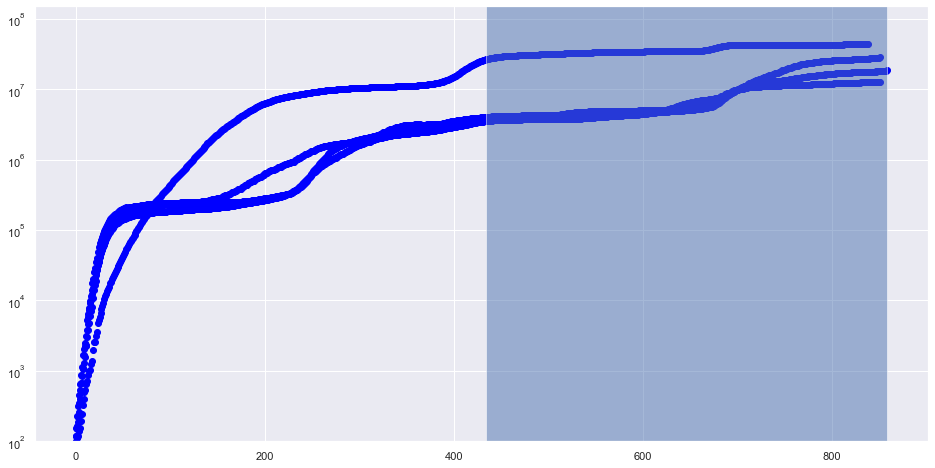

In [42]:
fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

axl.set_ylim(100,150000000)
axl.set_yscale('log')

In [43]:
from sklearn.metrics import mean_absolute_error

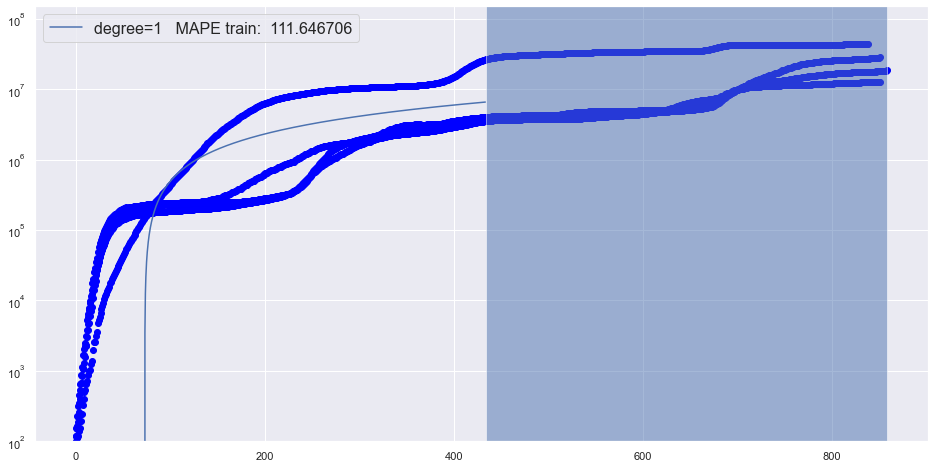

In [44]:
fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

degree = 1
y_hat_insaple = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
# X-train is the index on the x axis
# y_train is the points in blue colour corresponding to x axis
# insample prediction is the data on the light gray side on which we train and predict
# insample means we are doing check on insample dataset
# hat means predicted variable
axl.plot(X_train, y_hat_insaple, label = 'degree={0}'.format(degree) + '   MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:10])
# X_train is the x axis
# y_hat_insaple is the predicted y
# degree = {0} is the polynomial degree
# we have put calculated MSE in string format as we can concatenate two strings
# [0:10] means to show 9 digits in MSE value including decimal
# if you will run the above two commands i.e., y_hat_insaple and axl.plot under for degree in [1,2,3,5] you will get different..
# ...degree curves
axl.set_ylim(100,150000000)
axl.set_yscale('log')
axl.legend(loc = 'best', prop = {'size' : 16}); 
# loc is the location,prop keyword to adjust the legend size
# the semicolon is to avoid the text line which appears before graph

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

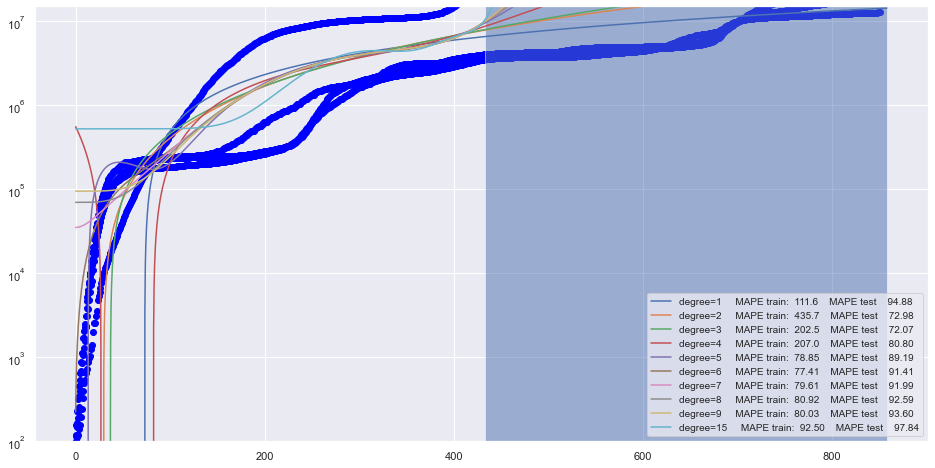

In [46]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,2,3,4,5,6,7,8,9,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:5]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:5]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',prop={'size': 10});